ChEn-3170: Computational Methods in Chemical Engineering Fall 2020 UMass Lowell; Prof. V. F. de Almeida **30Sep20**

# Laboratory Work 05 (01Oct20)
$
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\zvec}{\boldsymbol{\mathsf{z}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\abs}{abs}
$

### Name: `Your Name`

### Rubric for each assignment: 

|       Context          |  Points |
| -----------------------     | ------- |
| Precision of the answer     |   80%   |
| Answer Markdown readability |   10%   |
| Code readability            |   10%   |
    

### <span style="color:red">Guidance:</span>

+  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
   </span>
+  <span style="color:red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<span style="color:red">, to verify your notebook runs correctly.
   </span>
+  <span style="color:red">
    Save your file again.
   </span>
+  <span style="color:red">
    Upload the notebook file: 
   </span> labwork-xx.ipynb<span style="color:red"> on Blackboard.</span>

---
### Table of Assignments<a id="toa"></a>
* [Assignment 1 (35pts) ](#a1): $\Lmtrx$ forward solve.
 - [1.1)](#a11) Code the forward solve in a `Python` function.
 - [1.2)](#a12) Demonstrate that your solver is correct.
 - [1.3)](#a13) Verify your forward solve code against `NumPy`.
 - [1.4)](#a14) Test your forward solve code with a given matrix and right side vector.
* [Assignment 2 (35pts) ](#a2): $\Umtrx$ forward solve.
 - [2.1)](#a21) Code the backward solve in a `Python` function.
 - [2.2)](#a22) Demonstrate that your solver is correct.
 - [2.3)](#a23) Verify your backward solve code against `NumPy`.
 - [2.4)](#a24) Test your backward solve code with a given matrix and right side vector.
* [Assignment 3 (25pts)](#a3) Outer products.
 - [3.1)](#a31) Sample $\Lmtrx$ and $\Umtrx$.
 - [3.2)](#a32) Compute the product $\Lmtrx\,\Umtrx$ as a sum of vector outer products.
 - [3.3)](#a33) Plot the outer products and explain.
* [Assignment 4 (5pts)](#a4)
 ---

## <span style="color:blue">[Assignment 1 (35 pts)](#toa)</span><a id="a1"></a>

###  <span style="color:blue">[1.1)](#toa) Program a solution algorithm, as a `Python` function, for a system of equations with a lower triangular matrix of coefficients $\Lmtrx\,\xvec=\bvec$. The algorithm for solving $\Lmtrx\,\xvec=\bvec$ is as follows: </span>

<br>
<span style="color:blue">
\begin{equation*}
  x_i = \Bigl(b_i - \sum\limits_{j=1}^{i-1} L_{i,j}\,x_j \Bigr)\,L^{-1}_{i,i} \ \ \forall \ \ i=1,\ldots,m
\end{equation*}
</span>   
   
### <span style="color:blue">for $i$ and $j$ with offset 1. Recall that `NumPy` and `Python` have offset 0 for their sequence data types.</span><a id="a11"></a>

In [2]:
'''1.1) Forward solve function'''
import numpy as np

def forward_solve(l_mtrx, b_vec, loop_option='use-dot-product'):

    # sanity test
    assert isinstance(l_mtrx,np.ndarray)      # l_mtrx must be np.ndarray
    assert l_mtrx.shape[0] == l_mtrx.shape[1],'non-square matrix.' # l_mtrx must be square
    assert np.all(np.abs(np.diagonal(l_mtrx)) > 0.0),'zero value on diagonal.'
    rows_ids, cols_ids = np.where(np.abs(l_mtrx) > 0) # get i, j of non zero entries
    assert b_vec.shape[0] == l_mtrx.shape[0],'incompatible l_mtrx @ b_vec dimensions'  # b_vec must be compatible to l_mtrx
    assert loop_option == 'use-dot-product' or loop_option == 'use-double-loop'
    # end of sanity test

    m_rows = l_mtrx.shape[0]
    n_cols = m_rows
    x_vec = np.zeros(n_cols)

    if loop_option == 'use-dot-product':

        for i in range(m_rows):
            sum_lx = np.dot( l_mtrx[i,:i], x_vec[:i] )
            #sum_lx = l_mtrx[i,:i] @ x_vec[:i] # matrix-vec mult. alternative to dot product
            x_vec[i] = b_vec[i] - sum_lx
            x_vec[i] /= l_mtrx[i,i]

    elif loop_option == 'use-double-loop':

        for i in range(m_rows):
            sum_lx = 0.0
            for j in range(i):
                sum_lx += l_mtrx[i,j] * x_vec[j]
            x_vec[i] = b_vec[i] - sum_lx
            x_vec[i] /= l_mtrx[i,i]

    else:
        assert False, 'not allowed option: %r'%loop_option

    return x_vec 

### <span style="color:blue">[1.2)](#toa) Demonstrate that your solver is correct and explain why.</span><a id="a12"></a>

In [ ]:
'''1.2) Demontrate correctness'''


**Explanation:**

### <span style="color:blue">[1.3)](#toa) Using the `numpy.linalg.solve()` function solve the system given below, $\Lmtrx\,\yvec = \bvec$, print $\yvec$, and compute the norm of the difference of the solutions, i.e., $\norm{\xvec-\yvec}$ where $\xvec$ is the solution obtained from your solver. Explain your results.</span><a id="a13"></a>

In [3]:
'''1.3) Given data'''

import scipy.linalg
import numpy as np
from chen_3170.help import get_triangular_matrix

size = 10
l_mtrx = get_triangular_matrix( mode='lower', ndim=size )
l_mtrx += np.random.random(l_mtrx.shape) * 1e-09

b_vec = np.random.random(size)
y_vec = np.linalg.solve( l_mtrx, b_vec )
print('y_vec = ', y_vec) 

x_vec = forward_solve( l_mtrx, b_vec )
print('x_vec = ', x_vec)

res_vec=x_vec-y_vec
print('||x-y|| =', scipy.linalg.norm(res_vec))

y_vec =  [  14.84002114   -9.18515626    7.57166242  -16.63753423 -110.92299977
  276.63074243    9.47694927  -29.39636577 -862.28294397  277.65578483]
x_vec =  [  14.84001008   -9.18514881    7.57165678  -16.63752189 -110.92291939
  276.63054016    9.47694305  -29.39634413 -862.28231084  277.65557977]
||x-y|| = 0.0007008182702060655


In [ ]:
'''1.3) Compare solutions'''


**Explanation:**

### <span style="color:blue">[1.4)](#toa) Import the following image from URL: 
    
 + https://raw.githubusercontent.com/dpploy/chen-3170/master/notebooks/images/cermet.png
</span>
<br>

### <span style="color:blue">as a matrix $\Amtrx$ (need internet connection) and extract from it a lower triangular matrix of the same dimensions, show the image, and solve for a right side vector $\bvec$ with all ones as elements (*i.e.* $b_i = 1\ \forall \ i=1,\ldots,m$), using **your** forward solve function. Compute the difference of your solution to the solution obtained using the `numpy.linalg.solve()` function and show the norm of the difference. Clearly explain this value.
</span><a id="a14"></a>

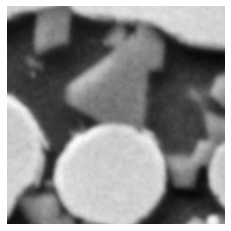

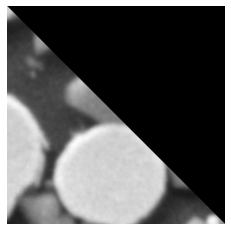

In [4]:
'''1.4) Test solver with a given A matrix'''
from matplotlib import pyplot as plt    
%matplotlib inline

block = plt.imread( 'https://raw.githubusercontent.com/dpploy/chen-3170/master/notebooks/images/cermet.png', format='png' )
plt.imshow( block,  cmap='gray' ) 
plt.axis('off')
plt.show()

a_mtrx = get_triangular_matrix( mtrx=block )

plt.imshow( a_mtrx,  cmap='gray' ) 
plt.axis('off')
plt.show()


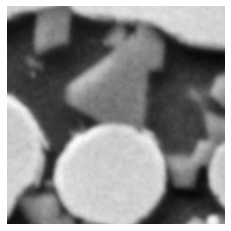

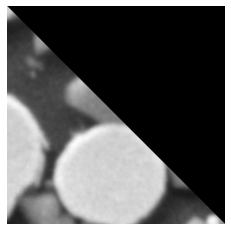

In [5]:
'''1.4) Test solver with a given A matrix'''


In [5]:
b_vec= np.ones( 500 )
y_vec = np.linalg.solve( a_mtrx, b_vec )

x_vec = forward_solve( a_mtrx, b_vec )
res_vec=x_vec-y_vec
print('||x-y|| =', scipy.linalg.norm(res_vec))

||x-y|| = 2.0000104649282222e-13


In [6]:
'''1.3) Solve L y = b for b equal to a vector of ones'''


||x_vec - y_vec|| = 2.803677e-13


**Explanation:**

## <span style="color:blue">[Assignment 2 (35 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue">[2.1)](#toa) Program a solution algorithm, as a `Python` function, for a system of equations with an upper triangular matrix of coefficients $\Umtrx\,\xvec=\bvec$. The algorithm for solving $\Umtrx\,\xvec=\bvec$  is as follows: </span>

<br>
<span style="color:blue">
\begin{equation*}
x_i = \Bigl(b_i - \sum\limits_{j=i+1}^{m} U_{i,j}\,x_j \Bigr)\,U^{-1}_{i,i} \ \ \forall \ \ i=m,\ldots,1
\end{equation*}
</span> 

### <span style="color:blue">for $i$ and $j$ with offset 1. Recall that `NumPy` and `Python` have offset 0 for their sequence data types.
</span><a id="a21"></a>

In [11]:
'''2.1) Backward solve function'''
import numpy as np
import numpy.linalg as linalg
from numpy import linalg

def backward_solve(u_mtrx, b_vec, loop_option='use-dot-product'):

    # sanity test
    assert isinstance(u_mtrx,np.ndarray)      # l_mtrx must be np.ndarray
    assert u_mtrx.shape[0] == u_mtrx.shape[1],'non-square matrix.' # l_mtrx must be square
    assert np.all(np.abs(np.diagonal(u_mtrx)) > 0.0),'zero value on diagonal.'
    rows_ids, cols_ids = np.where(np.abs(u_mtrx) > 0) # get i, j of non zero entries
    assert b_vec.shape[0] == u_mtrx.shape[0],'incompatible u_mtrx @ b_vec dimensions'  # b_vec must be compatible to l_mtrx
    assert loop_option == 'use-dot-product' or loop_option == 'use-double-loop'
    # end of sanity test

    m_rows = u_mtrx.shape[0]
    n_cols = m_rows
    x_vec = np.zeros(n_cols)

    if loop_option == 'use-dot-product':

        for i in reversed(range(m_rows)):
            dot_prod = np.dot( u_mtrx[i,i+1:], x_vec[i+1:] )
            x_vec[i] = b_vec[i] - dot_prod
            x_vec[i] /= u_mtrx[i,i]

    return x_vec




### <span style="color:blue">[2.2)](#toa) Demonstrate that your solver is correct and explain why.</span><a id="a22"></a>

In [13]:
'''2.2) Demontrate correctness'''
size = 5
u_mtrx = get_triangular_matrix( mode='upper', ndim=size )


b_vec = np.random.random(size)

y_vec=np.linalg.solve( u_mtrx, b_vec )
x_vec = backward_solve(u_mtrx, b_vec)
print(x_vec)
print(y_vec)
res_vec=x_vec-y_vec
print('||x-y|| =', scipy.linalg.norm(res_vec))

[ 299.3277135  -197.73241646    3.59650504   -0.51060728    0.84426165]
[ 299.3277135  -197.73241646    3.59650504   -0.51060728    0.84426165]
||x-y|| = 6.355287432313019e-14


**Explanation:**

### <span style="color:blue">[2.3)](#toa) Using the `numpy.linalg.solve()` function solve the system given below, $\Umtrx\,\yvec = \bvec$, print $\yvec$, and compute the norm of the difference of the solutions, i.e., $\norm{\xvec-\yvec}$ where $\xvec$ is the solution obtained from your solver. Explain your results.</span><a id="a23"></a>

In [3]:
'''2.3) Given data'''

import numpy as np
from chen_3170.help import get_triangular_matrix

size = 10
l_mtrx = get_triangular_matrix( mode='upper', ndim=size )
l_mtrx += np.random.random(l_mtrx.shape) * 1e-09

b_vec = np.random.random(size)

In [ ]:
'''2.3) Compare solutions'''


**Explanation:**

### <span style="color:blue">[2.4)](#toa) Extract from $\Amtrx$ (see 1.3) an upper triangular matrix of the same dimensions, show the image, and solve for a right side vector $\bvec$ with all ones as elements (<i>i.e.</i> $b_i = 1\ \forall \ i=1,\ldots,m$), using <b>your</b> backward solve function. Compute the difference of your solution to the solution obtained using the `numpy.linalg.solve()` function and show the norm of the difference. Clearly explain this value.</span><a id="a24"></a>

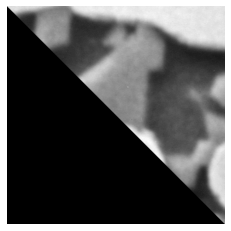

In [11]:
'''2.4) A matrix and its U part'''


In [12]:
'''2.4) Solve U y = b for b equal to a vector of ones'''


||x_vec - y_vec|| = 3.156795e-13


**Explanation:**

## <span style="color:blue">[Assignment 3 (25 pts)](#toa)</span><a id="a3"></a>

### <span style="color:blue">[3.1)](#toa) Sample $\Lmtrx$ and $\Umtrx$ by a factor of 35 and show a plot as follows.</span><a id="a31"></a>

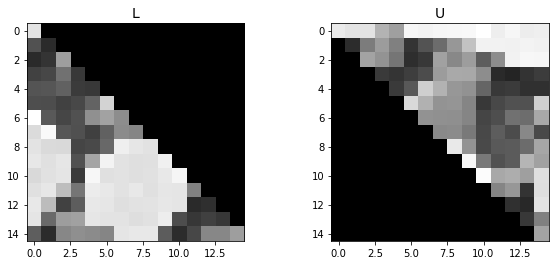

In [13]:
'''Sampled views of L and U'''


### <span style="color:blue">[3.2)](#toa) Compute the product $\Lmtrx\,\Umtrx$ as a sum of outer products:</span>

<br>
<span style="color:blue">
\begin{equation*}
  \Lmtrx\,\Umtrx = \sum\limits_{j=1}^{n} \Lmtrx_{\bullet,j}\otimes\Umtrx_{j,\bullet} 
\end{equation*}
</span>  

### <span style="color:blue">and show that the sum is correct.</span><a id="a32"></a>

In [14]:
'''Compute outer products sum and verify'''


L U - Sum of outer products = 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### <span style="color:blue">[3.3)](#toa) Plot all the outer products:</span>

<br>
<span style="color:blue">
\begin{equation*}
  \Lmtrx_{\bullet,j}\otimes\Umtrx_{j,\bullet} \ \  \  \forall \ \ \ j=1,\ldots,n
\end{equation*}
</span>  

### <span style="color:blue">as below and explain what is happening from left to right.</span><a id="a33"></a>

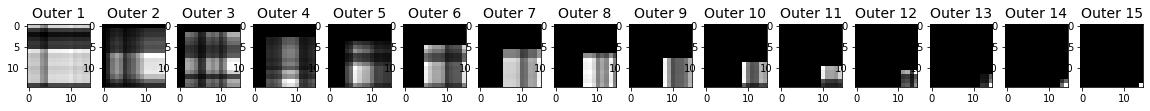

In [15]:
'''Plot all outer products'''


**Explanation:**

## <span style="color:blue">[Assignment 4 (5 pts)](#toa)</span><a id="a4"></a>

### <span style="color:blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</span>